In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import sklearn
%matplotlib inline

In [2]:
# Apply this to Yelp data
raw = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
raw.columns = ['message','spam']

In [3]:
# create some features
keywords = ['best', 'wonderful', 'incredible', 'good', 'fantastic', 'fast', 'excellent', 'heaven', 'fresh', 'gem', 'favorite'
           'funny', 'hilarious', 'masterpiece','brilliance']

for key in keywords:

    raw[str(key)] = raw.message.str.contains(
        str(key),
        case=False
    )

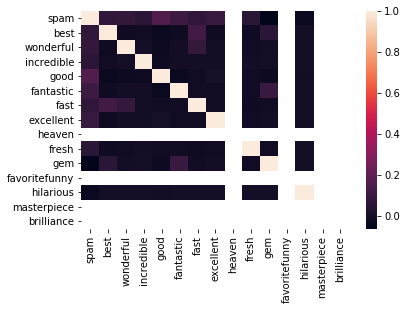

In [4]:
# check for independence among variables
sns.heatmap(raw.corr())

In [5]:
# looks like alot of independence in the variables - yay!
# sklearn requires some inputs
data = raw[keywords]
target = raw['spam']

In [6]:
# Try importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 398


In [7]:
# Try importing the Multinomial classifier.
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
mnb = MultinomialNB()

# Fit our model to the data.
mnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = mnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 417


In [8]:
# Try importing the Gaussian classifier.
from sklearn.naive_bayes import GaussianNB

# Instantiate our model and store it in a new variable.
gnb = GaussianNB()

# Fit our model to the data.
gnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = gnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 452


In [9]:
# There's a great deal of crossover in keywords between these two types - describing movies and food.
# Still, you can easily see some missing keywords in correlation chart.